# Homework 3 Questions

Please answer each of the questions below in the space provided. Copy the noteook, and when you're done, submit as an ipynb file. This will be graded on correctness. Please comment your code to help the grader figure out what you're doing. If you do a hypothesis test, please report all relevant p-values in the text field.

Imports and data loading:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

max23 = pd.read_csv('data/max_all.csv')
far23 = pd.read_csv('data/fardina_all.csv')
dat24 = pd.read_csv('data/2024.csv')
max25 = pd.read_csv('data/max_spring2025.csv')

questions_succint = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

questions_succint_primer = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "compassion primer",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

aita_questions = [
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

max23.columns = questions_succint
far23.columns = questions_succint_primer
dat24.columns = questions_succint
max25.columns = questions_succint

personal = [
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
]

Data cleaning:

In [3]:
def clean_data(to_clean):
    df = to_clean.copy()
    
    df["na_count"] = df.isna().sum(axis=1)
    df = df[df["na_count"] < 4]

    df["gender"] = df["gender"].apply(lambda x: x if x != "Famale" else "Female")

    df["age"] = df["age"].apply(lambda x: x if x != "50+" else "50")

    df["year"] = df["year"].apply(lambda x: x if x != "Sophmore" else "Sophomore")

    df["age"] = df["age"].apply(lambda x: str(float(x)))
    
    df["religion"] = df["religion"].apply(lambda x: x if x != "Not spiritual at all" else "Not religious at all")
    df["religion"] = df["religion"].apply(lambda x: x if x != "Somewhat spiritual" else "Somewhat religious")
    df["religion"] = df["religion"].apply(lambda x: x if x != "Strongly spiritual" else "Strongly religious")

    for i in questions_succint:
        df[i].fillna(df[i].mode()[0], inplace=True)

    return df


max23 = clean_data(max23)
far23 = clean_data(far23)
dat24 = clean_data(dat24)
max25 = clean_data(max25)

C:\Users\jonat\AppData\Local\Temp\ipykernel_72568\1564923334.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_72568\1564923334.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

1. Create a graph telling a story about students political beliefs vs. their parents.

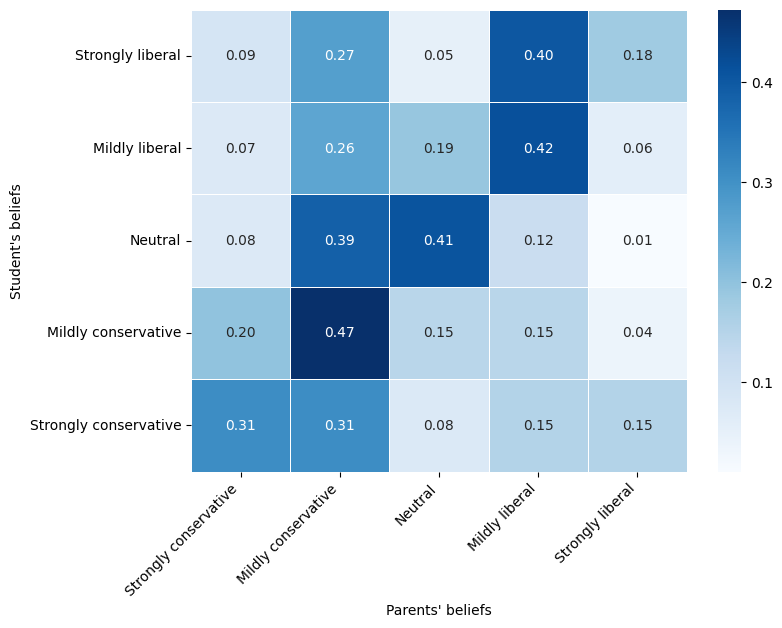

In [4]:
all = pd.concat([max23,far23,dat24,max25])
all_pol = all[all["self"] != "Don't know / It's complicated"]
all_pol = all_pol[all_pol["upbringing"] != "Don't know / It's complicated"]

leans = ["Strongly liberal", "Mildly liberal", "Neutral", "Mildly conservative", "Strongly conservative"]

hm_data = pd.crosstab(all_pol["self"], all_pol["upbringing"])

leans_rev = leans.copy()
leans_rev.reverse()

hm_data = hm_data.reindex(index=leans, columns=leans_rev)

hm_data_normalized = hm_data.div(hm_data.sum(axis=1), axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(hm_data_normalized, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

plt.xticks(rotation=45, ha="right") 
plt.yticks(rotation=0) 

plt.xlabel("Parents' beliefs")
plt.ylabel("Student's beliefs")

plt.show()

The above heatmap displays the percent of students with X political leaning whose parents identified with Y political leaning.

There are two interesting trends here. One on the anti-diagonal, implying that students of a particular belief are more likely to have parents with the same beliefs. The other is on parents beliefs = "Mildly conservative," which has high proportions compared to other squares, implying that either parents tend to be mildly conservative or students percieve their parents as mildly conservative.

Don't know / It's complicated is dropped because it doesn't directly help in drawing conclusions about beliefs.

2. Show the percent of political beliefs over all the respondants (so the percent of liberals, conservatives, etc).

In [5]:
p = all["self"].value_counts() / len(all) * 100
leans = ["Strongly liberal", "Mildly liberal", "Neutral", "Mildly conservative", "Strongly conservative", "Don't know / It's complicated"]

for i in leans:
    print(f"{p[i]:.2f}% of students lean {i}")

17.96% of students lean Strongly liberal
38.36% of students lean Mildly liberal
22.62% of students lean Neutral
12.20% of students lean Mildly conservative
2.88% of students lean Strongly conservative
5.99% of students lean Don't know / It's complicated


3. Does the priming question have a statistically significant effect on any questions? If so, which ones?

Your answer here:

In [6]:
primed = pd.concat([max23,far23])
primed = clean_data(primed)
primed["primed"] = ~(primed["compassion primer"].isna())

for i in aita_questions:
    data = pd.crosstab(primed["primed"], primed[i])
    stat, p, dof, expected = chi2_contingency(data)

    print(i)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

doctor
p value is 0.020811781836627116
Dependent (reject H0)

reading
p value is 0.8928249959907169
Independent (H0 holds true)

trust fund
p value is 0.0074989994754336205
Dependent (reject H0)

private school
p value is 0.4740342379717112
Independent (H0 holds true)

cat
p value is 0.17434631299829817
Independent (H0 holds true)

burned food
p value is 0.8700014240463547
Independent (H0 holds true)

flight
p value is 0.4419259824922178
Independent (H0 holds true)

child support
p value is 0.06359035780103356
Independent (H0 holds true)

investigation
p value is 0.03136107673878985
Dependent (reject H0)

expensive school
p value is 0.5818947486486088
Independent (H0 holds true)

in law
p value is 0.8843830620211782
Independent (H0 holds true)

lgbtq
p value is 0.08536331124686308
Independent (H0 holds true)

drinking
p value is 0.7859856375974368
Independent (H0 holds true)

hair dye
p value is 0.9980100227689874
Independent (H0 holds true)



C:\Users\jonat\AppData\Local\Temp\ipykernel_72568\1564923334.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


Based on chi-squared tests, the doctor question, the trust fund question, and the investigator question were affected by the priming question.

Only the 2023 surveys were used because swapping gender could have had an effect on some questions.

4. Does swapping genders have a stastically significant effect on any questions? If so, which ones?

Your answer here:

In [7]:
max23["q gender"] = ["Female" for i in range(len(max23))]
far23["q gender"] = ["Female" for i in range(len(far23))]
dat24["q gender"] = ["Male" for i in range(len(dat24))]
max25["q gender"] = ["Male" for i in range(len(max25))]

gender = pd.concat([max23,far23, dat24, max25])
gender = clean_data(gender)

for i in aita_questions:
    data = pd.crosstab(gender["q gender"], gender[i])
    stat, p, dof, expected = chi2_contingency(data)

    print(i)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

doctor
p value is 0.0001502769448174831
Dependent (reject H0)



C:\Users\jonat\AppData\Local\Temp\ipykernel_72568\1564923334.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


reading
p value is 0.09967030030768555
Independent (H0 holds true)

trust fund
p value is 0.05534947939440297
Independent (H0 holds true)

private school
p value is 1.2148252597400195e-06
Dependent (reject H0)

cat
p value is 0.12209473637728271
Independent (H0 holds true)

burned food
p value is 0.26736252031172136
Independent (H0 holds true)

flight
p value is 0.15320832276214544
Independent (H0 holds true)

child support
p value is 0.5112878353214236
Independent (H0 holds true)

investigation
p value is 0.713185166072029
Independent (H0 holds true)

expensive school
p value is 0.22845379155035828
Independent (H0 holds true)

in law
p value is 3.8521740681221876e-06
Dependent (reject H0)

lgbtq
p value is 0.5229099837704329
Independent (H0 holds true)

drinking
p value is 0.13655493011945546
Independent (H0 holds true)

hair dye
p value is 0.007159654815642056
Dependent (reject H0)



The gender(s) used in the question affected the doctor question, private school question, and hair dye question for alpha=0.05.

There was a typo for the gender swap on the in-law question suggesting that the significant other of the parent-in-law ought to be paying for the in-law's child support, which was not the original intent of the question. This typo is likely the reason for the very low p-value.

5. What hour of the day were most of the surveys completed?

Your answer here:

In [8]:
time = pd.concat([max23,far23, dat24, max25])
t = pd.to_datetime(time["time"])
t.dt.hour.value_counts()

time
9     69
21    53
18    42
16    40
17    36
19    29
11    25
22    23
10    22
23    17
13    16
14    14
12    14
20    14
15    13
0      7
1      7
2      4
8      3
7      2
4      1
Name: count, dtype: int64

The most surveys were completed at 9a.m.

8. Which question this semseter was most strongly influenced by respondants religious views?

Your answer:

In [9]:
rel = pd.concat([max25])
rel = clean_data(rel)

for i in aita_questions:
    data = pd.crosstab(rel["religion"], rel[i])
    stat, p, dof, expected = chi2_contingency(data)

    print(i)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

doctor
p value is 0.581612668386988
Independent (H0 holds true)

reading
p value is 0.5591016343511617
Independent (H0 holds true)

trust fund
p value is 0.38064807077574403
Independent (H0 holds true)

private school
p value is 0.28436762364819324
Independent (H0 holds true)

cat
p value is 0.8610221549430153
Independent (H0 holds true)

burned food
p value is 0.9606511745845083
Independent (H0 holds true)

flight
p value is 0.5414739704645541
Independent (H0 holds true)

child support
p value is 0.643482823232413
Independent (H0 holds true)

investigation
p value is 0.9805764664776445
Independent (H0 holds true)

expensive school
p value is 0.5637248237468016
Independent (H0 holds true)

in law
p value is 0.8555427766201652
Independent (H0 holds true)

lgbtq
p value is 0.031236046051202344
Dependent (reject H0)

drinking
p value is 0.7594495732969258
Independent (H0 holds true)

hair dye
p value is 0.7859192677357157
Independent (H0 holds true)



C:\Users\jonat\AppData\Local\Temp\ipykernel_72568\1564923334.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


The question most influenced by religiousness this semester was the question regarding donating money to an LGBTQ charity, p=0.0312 by a chi-squared test.

9. Are there any questions where graduate students had a stastically signifant difference from undergraduate students? If so, which ones?

Your answer:

In [10]:
year = pd.concat([max23,far23, dat24, max25])
year = clean_data(year)

print(year["year"].value_counts())
print()

for i in aita_questions:
    data = pd.crosstab(year["year"], year[i])
    stat, p, dof, expected = chi2_contingency(data)

    print(i)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

C:\Users\jonat\AppData\Local\Temp\ipykernel_72568\1564923334.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


year
Junior              227
Sophomore           121
Senior               69
Graduate Student     24
Other                 5
Freshman              5
Name: count, dtype: int64

doctor
p value is 0.1775979934623674
Independent (H0 holds true)

reading
p value is 0.38409704411374296
Independent (H0 holds true)

trust fund
p value is 0.16746382047080244
Independent (H0 holds true)

private school
p value is 0.2363654212065533
Independent (H0 holds true)

cat
p value is 0.8848478211598865
Independent (H0 holds true)

burned food
p value is 0.8820087033014964
Independent (H0 holds true)

flight
p value is 0.8483799550699007
Independent (H0 holds true)

child support
p value is 0.05464089861910975
Independent (H0 holds true)

investigation
p value is 0.6608254089807277
Independent (H0 holds true)

expensive school
p value is 0.2829710998102689
Independent (H0 holds true)

in law
p value is 0.13421075984321054
Independent (H0 holds true)

lgbtq
p value is 0.5128063873593015
Independent (H0 hol

No, but there are also only 24 graduate student responses, so there may not be enough data.

10. Bin the responses by morning, afternoon, evening and night. Do these catagories have a statistically significant effect on any questions? If so, which ones?

Your answer:

In [25]:
time = pd.concat([max23,far23, dat24, max25])
t = pd.to_datetime(time["time"])
time["hour"] = t.dt.hour
time["tod"] = time["hour"].apply(lambda x: "morning" if x in range(6,12) else ("afternoon" if x in range(12,18) else ("evening" if x in range(18,21) else "night")))

for i in aita_questions:
    data = pd.crosstab(time["tod"], time[i])
    stat, p, dof, expected = chi2_contingency(data)

    print(i)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')
    print()

doctor
p value is 0.04604756913414801
Dependent (reject H0)

reading
p value is 0.8727132831764379
Independent (H0 holds true)

trust fund
p value is 0.05066403913775114
Independent (H0 holds true)

private school
p value is 0.12185422263033525
Independent (H0 holds true)

cat
p value is 0.48058654528442735
Independent (H0 holds true)

burned food
p value is 0.044005630380098984
Dependent (reject H0)

flight
p value is 0.38650480893941036
Independent (H0 holds true)

child support
p value is 0.06774350189758405
Independent (H0 holds true)

investigation
p value is 0.47736631518175365
Independent (H0 holds true)

expensive school
p value is 0.03618779507336626
Dependent (reject H0)

in law
p value is 0.0002482691685889392
Dependent (reject H0)

lgbtq
p value is 0.41543057475717843
Independent (H0 holds true)

drinking
p value is 0.8913854659766927
Independent (H0 holds true)

hair dye
p value is 0.5420371579891505
Independent (H0 holds true)



In [34]:
from itertools import combinations

times = ["morning", "afternoon", "evening", "night"]

uniq = list(combinations(times, 2))
uniq

[('morning', 'afternoon'),
 ('morning', 'evening'),
 ('morning', 'night'),
 ('afternoon', 'evening'),
 ('afternoon', 'night'),
 ('evening', 'night')]

In [38]:
for i in ["doctor", "burned food", "expensive school", "in law"]:
        for j, k in uniq:
                time_limited = time[time["tod"].isin([j, k])]
                data = pd.crosstab(time_limited["tod"], time_limited[i])
                stat, p, dof, expected = chi2_contingency(data)

                alpha = 0.05
                if p <= alpha:
                    print(f"{i}, {j}, {k}")
                    print("\tp value is " + str(p))
        print()

doctor, afternoon, night
	p value is 0.003869563936419244
doctor, evening, night
	p value is 0.03674917540585698

burned food, afternoon, evening
	p value is 0.033544404168203104
burned food, evening, night
	p value is 0.0018820917543328022

expensive school, afternoon, night
	p value is 0.010452054456619396

in law, morning, afternoon
	p value is 0.0013242391165011224
in law, morning, evening
	p value is 0.012446367868229368
in law, morning, night
	p value is 6.005081225593726e-05



For the doctor question, burned food question, expensive school question it seems that the time has an effect. The in-law question being affected could be a product of the previously mentioned typo.